In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

Using TensorFlow backend.


In [3]:
data_path = 'Bike-Sharing-Dataset/hour.csv'

rides = pd.read_csv(data_path)

In [4]:
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


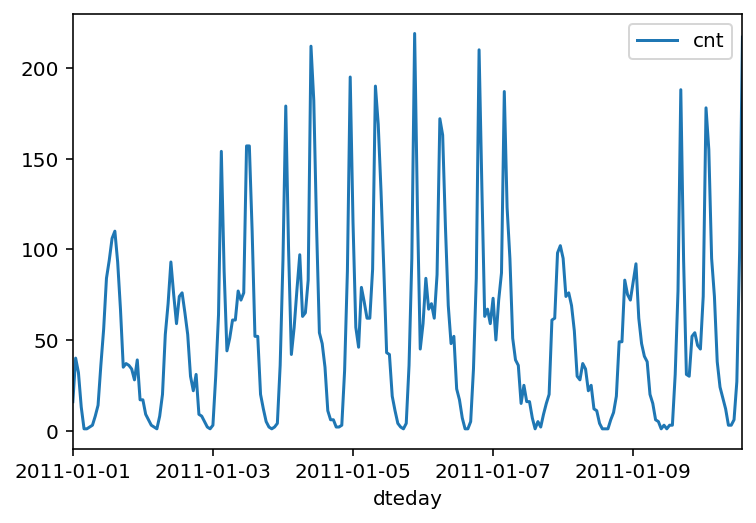

In [5]:
rides[:24*10].plot(x='dteday', y='cnt')

In [6]:
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
data = pd.get_dummies(rides, columns=dummy_fields, drop_first=True)

In [7]:
fields_to_drop = ['instant', 'dteday', 'atemp', 'workingday']
data = data.drop(fields_to_drop, axis=1)

In [8]:
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_2,season_3,...,hr_20,hr_21,hr_22,hr_23,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
test_data = data[-21*24:]
train_data = data[:-21*24]

quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
features = train_data[quant_features]
sc = StandardScaler()
features = sc.fit_transform(features)
train_data[quant_features] = features

features = test_data[quant_features]
features = sc.transform(features)
test_data[quant_features] = features

In [10]:
# Separate the data into features and targets
target_fields = ['cnt', 'casual', 'registered']
X_train, y_train = train_data.drop(target_fields, axis=1), train_data['cnt']
X_test, y_test = test_data.drop(target_fields, axis=1), test_data['cnt']

In [11]:
X_train.head()

,yr,holiday,temp,hum,windspeed,season_2,season_3,season_4,weathersit_2,weathersit_3,...,hr_20,hr_21,hr_22,hr_23,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,-1.370568,0.946667,-1.558454,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,-1.474810,0.895022,-1.558454,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,-1.474810,0.895022,-1.558454,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,-1.370568,0.636799,-1.558454,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,-1.370568,0.636799,-1.558454,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
def baseline_model(optimizer='adam'):
    clf = Sequential()
    clf.add(Dense(units=32, kernel_initializer='uniform', activation='relu',
                  input_dim=51))
    clf.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
    clf.add(Dense(units=1, kernel_initializer='uniform'))
    clf.compile(optimizer=optimizer, loss='mean_squared_error')

    return clf

In [13]:
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5)

In [26]:
results = cross_val_score(estimator, X_train, y_train, cv=10, n_jobs=-1)

In [27]:
print(f'Baseline: {results.mean()} {results.std()}')

Baseline: -0.10154758057978666 0.05114202816733275


In [28]:
results

array([-0.03524839, -0.06228163, -0.06390676, -0.07783316, -0.06382465,
       -0.07154715, -0.16707929, -0.12453458, -0.18903843, -0.16018175])

In [15]:
estimator2 = baseline_model()

W0212 16:31:21.998059 4557282752 deprecation_wrapper.py:119] From /Users/pramote/py374-venv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0212 16:31:22.011445 4557282752 deprecation_wrapper.py:119] From /Users/pramote/py374-venv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0212 16:31:22.013593 4557282752 deprecation_wrapper.py:119] From /Users/pramote/py374-venv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0212 16:31:22.045848 4557282752 deprecation_wrapper.py:119] From /Users/pramote/py374-venv/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [16]:
estimator2.fit(X_train, y_train, batch_size=10, epochs=100)

W0212 16:31:30.132774 4557282752 deprecation_wrapper.py:119] From /Users/pramote/py374-venv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0212 16:31:30.276298 4557282752 deprecation_wrapper.py:119] From /Users/pramote/py374-venv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/100
16875/16875 [==============================] - 1s 64us/step - loss: 0.3438
Epoch 2/100
16875/16875 [==============================] - 1s 53us/step - loss: 0.1421
Epoch 3/100
16875/16875 [==============================] - 1s 53us/step - loss: 0.0831
Epoch 4/100
16875/16875 [==============================] - 1s 53us/step - loss: 0.0688
Epoch 5/100
16875/16875 [==============================] - 1s 52us/step - loss: 0.0624
Epoch 6/100
16875/16875 [==============================] - 1s 54us/step - loss: 0.0587
Epoch 7/100
16875/16875 [==============================] - 1s 53us/step - loss: 0.0573
Epoch 8/100
16875/16875 [==============================] - 1s 53us/step - loss: 0.0553
Epoch 9/100
16875/16875 [==============================] - 1s 53us/step - loss: 0.0539
Epoch 10/100
16875/16875 [==============================] - 1s 52us/step - loss: 0.0534
Epoch 11/100
16875/16875 [==============================] - 1s 55us/step - loss: 0.0530
Epoch 12/100
16875/16875 [===============

16875/16875 [==============================] - 1s 52us/step - loss: 0.0381
Epoch 95/100
16875/16875 [==============================] - 1s 52us/step - loss: 0.0376
Epoch 96/100
16875/16875 [==============================] - 1s 54us/step - loss: 0.0378
Epoch 97/100
16875/16875 [==============================] - 1s 52us/step - loss: 0.0374
Epoch 98/100
16875/16875 [==============================] - 1s 52us/step - loss: 0.0377
Epoch 99/100
16875/16875 [==============================] - 1s 52us/step - loss: 0.0377
Epoch 100/100
16875/16875 [==============================] - 1s 52us/step - loss: 0.0373


In [17]:
y_pred = estimator2.predict(X_test)

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
mse = mean_squared_error(y_test, y_pred)

In [20]:
print(f'MSE: {mse}')

MSE: 0.12638792479448202


In [21]:
df = rides[-21*24:]

In [22]:
df['y_test'] = y_test.values
df['y_pred'] = y_pred

In [23]:
df = df[['dteday', 'y_test', 'y_pred']]

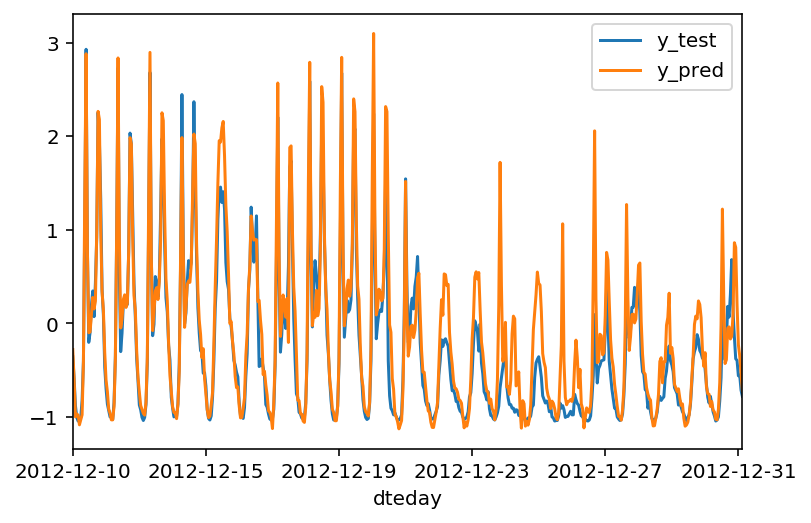

In [24]:
df.set_index('dteday').plot()

In [25]:
y_test

16875   -0.356434
16876   -0.587080
16877   -0.878134
16878   -1.004441
16879   -1.042882
           ...   
17374   -0.394875
17375   -0.559622
17376   -0.554131
17377   -0.713387
17378   -0.779286
Name: cnt, Length: 504, dtype: float64